In [56]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np

In [18]:
G = nx.karate_club_graph()

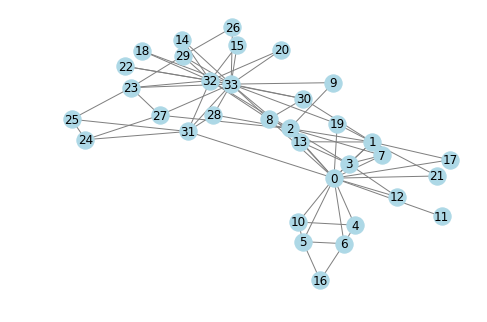

In [21]:
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")

In [22]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [23]:
G.degree()[33]

17

In [24]:
G.degree(33)

17

In [31]:
print(G.number_of_nodes(), G.number_of_edges())

34 78


In [39]:
def er_graph(N, p):
    """
    Generate an ER graph.
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G

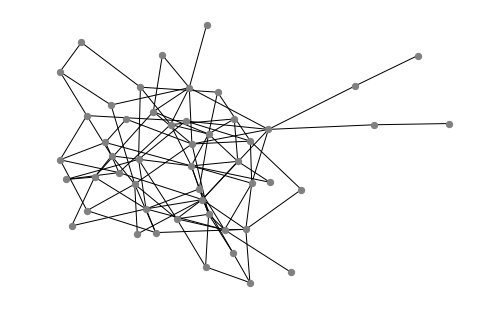

In [40]:
nx.draw(er_graph(50, 0.08), node_size=40, node_color="gray")

In [46]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")

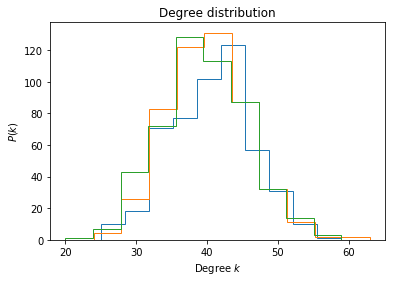

In [51]:
G1 = er_graph(500, 0.08)
plot_degree_distribution(G1)
G2 = er_graph(500, 0.08)
plot_degree_distribution(G2)
G3 = er_graph(500, 0.08)
plot_degree_distribution(G3)

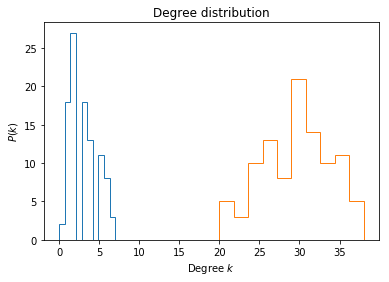

In [53]:
G1 = er_graph(100, 0.03)
plot_degree_distribution(G1)
G2 = er_graph(100, 0.30)
plot_degree_distribution(G2)

NameError: name 'np' is not defined

In [57]:
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

In [58]:
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

/home/clementpoiret/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [59]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [60]:
basic_net_stats(G1)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08


In [61]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


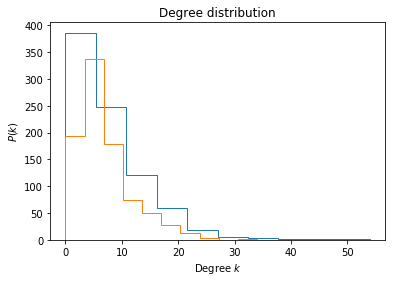

In [62]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")

In [66]:
gen = nx.connected_component_subgraphs(G1)
g = gen.__next__()

In [67]:
g.number_of_nodes()

825

In [68]:
G1_LCC = max(nx.connected_component_subgraphs(G1), key=len)
G2_LCC = max(nx.connected_component_subgraphs(G2), key=len)

In [69]:
G1_LCC.number_of_nodes() / G1.number_of_nodes()

0.9786476868327402

In [70]:
G2_LCC.number_of_nodes() / G2.number_of_nodes()

0.9236031927023945

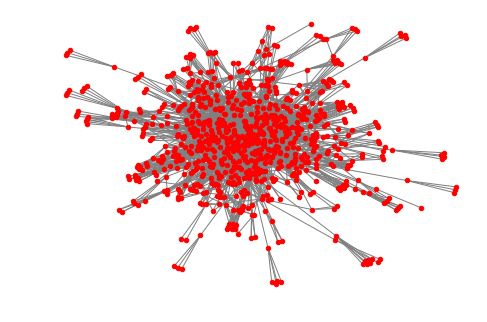

In [71]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size=20)
plt.savefig("village1.pdf")

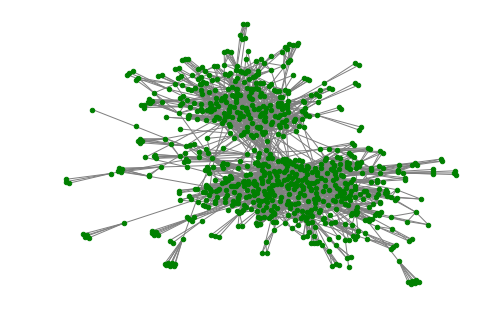

In [72]:
plt.figure()
nx.draw(G2_LCC, node_color="green", edge_color="gray", node_size=20)
plt.savefig("village2.pdf")

In [73]:
print(len(G1_LCC), len(G2_LCC))

825 810


In [74]:
from collections import Counter
def frequency(chars):
    frequencies = dict(Counter(chars.values()))
    sum_frequencies = sum(frequencies.values())
    for key in frequencies:
        frequencies[key] /= sum_frequencies
    return frequencies
        
        
def chance_homophily(chars):
    frequencies = frequency(chars)
    return np.sum(np.square(list(frequencies.values())))

favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}

color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

0.5555555555555556
